### **1. ML Mindset & Problem Framing**

* Any ML model purpose is to predict or forecast something based on data. For this, the data should be cleaned and prepared properly as the model wanted. From Regreesion model i have chosen Linear Regression. It is simple and easy to understand.
Linear Regreesion uses the concept that any features have a linear relationship with a target feature. Hence if most of our data features have non-linear relationship with target variable, our model couldnot do a better job.

* We use ML models over some fixed rules, because these models can see and understand complex relationship between many features, and later use this comprehension about the data for their prediciton. When a ML model is trained on a data, behind the scene it use a loss function to constatly resolve its mistaken assumptions and improve accuracy. This is why ML models are smarter and flexible than just a simple mathematical formula.

* The model is expected to learn that features like 'Distance_km' and 'Time_duration_min' have a direct relationsip with the target variable. It also expected to understand the relationship between features for determinig a target variable accurately.

### **2. Data Exploration & Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\yrdns\OneDrive\Desktop\GDG-works\Mini-project\data\ride_csv.csv')
df.head()

,Distance_km,Trip_duration_min,Time_of_day,Day_type,Traffic_level,Weather,Demand_level,Price_USD
0,19.98,999,Morning,Weekday,NaN,RAINY,High,45.552419
1,0.50,10,Afternoon,Weekday,Low,Clear,High,250.000000
2,37.14,28,Evening,Weekend,High,RAINY,High,65.141703
3,30.74,11,Night,Weekend,High,RAINY,High,53.343512
4,9.49,62,Morning,Weekday,Medium,RAINY,High,26.006960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance_km        150 non-null    float64
 1   Trip_duration_min  150 non-null    int64  
 2   Time_of_day        150 non-null    object 
 3   Day_type           150 non-null    object 
 4   Traffic_level      135 non-null    object 
 5   Weather            150 non-null    object 
 6   Demand_level       150 non-null    object 
 7   Price_USD          150 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Distance_km,Trip_duration_min,Price_USD
count,150.000000,150.000000,150.000000
mean,23.336533,67.046667,49.370773
std,14.967028,82.802452,27.088609
min,-5.000000,10.000000,10.281193
25%,11.072500,33.000000,30.102951
50%,22.510000,57.500000,47.587837
75%,36.802500,89.000000,67.788484
max,49.370000,999.000000,250.000000


In [5]:
z = ['Distance_km','Trip_duration_min', 'Price_USD']
numerical_feature = df[z]
categorical_feature = df.drop(columns=z)
print(f"Numerical features {numerical_feature.columns}")
print(f"Categorical features {categorical_feature.columns}")

Numerical features Index(['Distance_km', 'Trip_duration_min', 'Price_USD'], dtype='object')
Categorical features Index(['Time_of_day', 'Day_type', 'Traffic_level', 'Weather', 'Demand_level'], dtype='object')


In [6]:
for n in categorical_feature.columns:
    print(f"Unique values in column {n} are: {categorical_feature[n].unique()}")

Unique values in column Time_of_day are: ['Morning' 'Afternoon' 'Evening' 'Night']
Unique values in column Day_type are: ['Weekday' 'Weekend']
Unique values in column Traffic_level are: [nan 'Low' 'High' 'Medium']
Unique values in column Weather are: ['RAINY' 'Clear' 'Snowy']
Unique values in column Demand_level are: ['High' 'Low' 'Medium']


- *the dataset have 150 rows and 8 columns.*
- *feature 'Traffic_level' has 15 NAN values.*
- *feature 'Distance_km' has a negative value, which should not be there.*
- *looking at the max values: features 'Trip_duration_min' & 'Price_USD' have an outliers. Thier std values is also high.*

<Axes: xlabel='Trip_duration_min'>

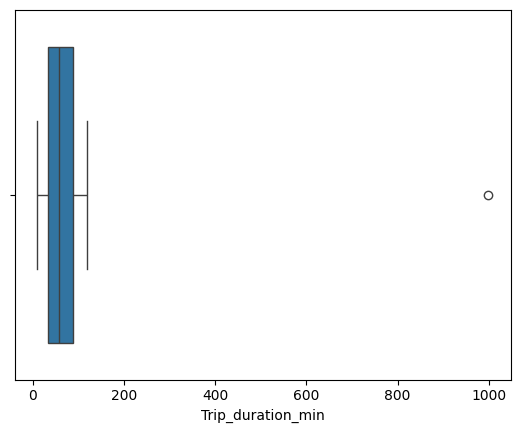

In [7]:
sns.boxplot(x=df['Trip_duration_min'])

<Axes: xlabel='Price_USD'>

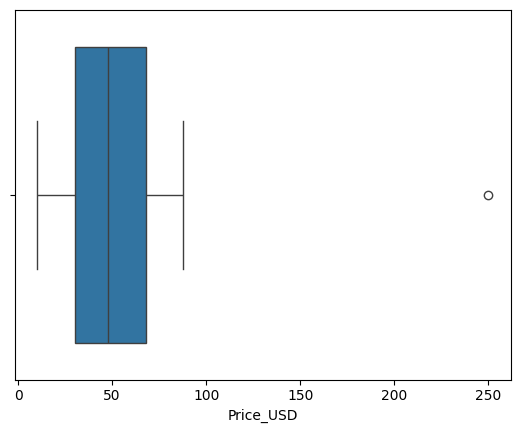

In [8]:
sns.boxplot(x=df['Price_USD'])

### **3. Data Cleaning & Feature Engineering**

In [9]:
df['Traffic_level'].mode()[0]

'Low'

In [10]:
# Replacing the Nan values with a mode value of the column
df['Traffic_level'] = df['Traffic_level'].fillna(df['Traffic_level'].mode()[0])  # replacing NAN values in Traffic_level feature with the most repeated value which is 'Low'

# Cutting negative values in feature 'Distance_km'
df = df[df['Distance_km'] > 0]

# Dropping outlier values in features 'Trip_duration_min' & 'Price_USD'
# 999 for 'Trip_duration_min' & 250$ for 'Price_USD'
df = df[df['Trip_duration_min'] < 200]
df = df[df['Price_USD'] < 100]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 2 to 149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance_km        142 non-null    float64
 1   Trip_duration_min  142 non-null    int64  
 2   Time_of_day        142 non-null    object 
 3   Day_type           142 non-null    object 
 4   Traffic_level      142 non-null    object 
 5   Weather            142 non-null    object 
 6   Demand_level       142 non-null    object 
 7   Price_USD          142 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 10.0+ KB


In [12]:
df.describe()

,Distance_km,Trip_duration_min,Price_USD
count,142.000000,142.000000,142.000000
mean,24.718310,61.161972,48.220358
std,14.030395,31.777738,21.296352
min,2.270000,10.000000,10.281193
25%,12.950000,33.000000,30.312250
50%,24.280000,57.000000,47.958755
75%,37.110000,89.000000,67.243141
max,49.370000,119.000000,87.792024


<Axes: >

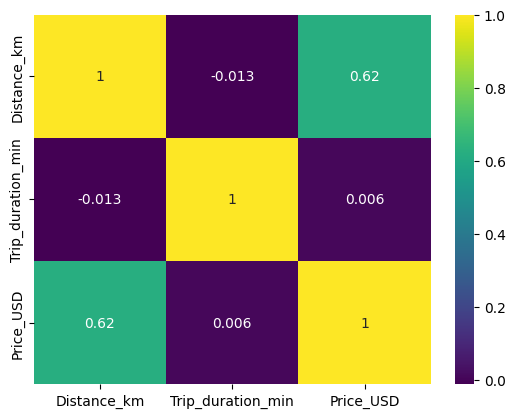

In [13]:
corr = numerical_feature.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

#### *It looks like we are having a good relationship between Distance_km and Price_USD*

#### Note: Datasets that have outliers or NAN values can make our model to perform poorly or badly.
- models like linear regression relies on mean, so with an outlier like a 999 min in feature trip duration, a mean can be streched because of just one or few values. when outliers are found in dataset and they are few in numbers, the best thing to deal with them is to drop them.
- metrics like MSE(mean squared error) calculates the square of the difference b/n actual and predicted values. outliers can make the loss function to be big and limits the models ability to learn smaller and important patterns.
- sicikit learn models simply do not work with a dataset that have even a single NAN values.

In [14]:
# Let me encode and scale the dataset using a simple way which is columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Define which columns get which treatment
num_features = ['Distance_km', 'Trip_duration_min'] # to prevent data leakage i will not scale the target varible
nom_features = ['Weather', 'Time_of_day', 'Day_type'] # nominal features that have no orders
ord_features = ['Traffic_level', 'Demand_level']  # ordinal features

# Creating the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('nom', OneHotEncoder(drop='first'), nom_features),
        ('ord', OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                           ['Low', 'Medium', 'High']]), ord_features)
    ],
    remainder='passthrough'  # keep any other columns as they are
)

##### Note: During encoding nominal categorical features that have not an order shall not be encoded using any ordinal encoders. This is due to that the model will assume that there is a distance difference for example b/n 1 and 2 as 2 being more important value than 1. This will mislead our model.

In [15]:
## Apply the preprocessor
df_transformed = preprocessor.fit_transform(df)
## Convert the transformed NumPy array back to a pandas DataFrame
df_final = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())
df_final

,num__Distance_km,num__Trip_duration_min,nom__Weather_RAINY,nom__Weather_Snowy,nom__Time_of_day_Evening,nom__Time_of_day_Morning,nom__Time_of_day_Night,nom__Day_type_Weekend,ord__Traffic_level,ord__Demand_level,remainder__Price_USD
0,0.888475,-1.047254,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,65.141703
1,0.430708,-1.584113,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,53.343512
2,-1.089222,0.026465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,26.006960
3,-1.089222,-0.257755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.101226
4,-1.425395,1.194924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,24.568941
...,...,...,...,...,...,...,...,...,...,...,...
137,-1.498352,-0.257755,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,14.807830
138,0.467902,1.258084,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,64.162211
139,0.100973,-0.699874,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,47.305835
140,-1.448283,1.289663,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,18.603529


### **4. Regression Model: Price Prediction**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Spliting data into input features and target feature
x = df_final.drop('remainder__Price_USD', axis=1)
y = df_final['remainder__Price_USD']

# Spliting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Linear Regression model_1 
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

# Predict ride prices 
pred = model_1.predict(x_test)
pred[0:5]   # the first 5 prediction for x_test input values

array([80.2559036 , 53.1912015 , 51.69035193, 76.82154752, 33.95607224])

The Root Mean Squared Error is: 2.705450026227254


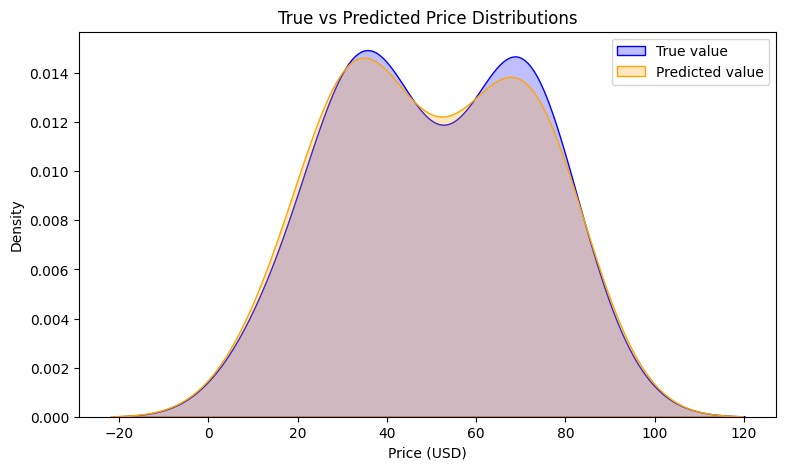

In [17]:
from sklearn.metrics import root_mean_squared_error as rmse

# Evaluating the model
accuracy = rmse(y_test, pred)
print(f"The Root Mean Squared Error is: {accuracy}")

# Plot predicted vs actual prices 
plt.figure(figsize=(9,5))

sns.kdeplot(y_test, label='True value', fill=True, color='blue')
sns.kdeplot(pred, label='Predicted value', fill=True, color='orange')

plt.title('True vs Predicted Price Distributions')
plt.xlabel('Price (USD)')
plt.legend()
plt.show()

##### *A RMSE of 2.7 means my price prediction is typically off by 2.7 dollar from the actual value. Giving that the actual prices are over 10 dollar, i can say my model has done a good job.*

### **5. Classification Model: High-Cost vs Low-Cost Ride**

In [18]:
df_final['remainder__Price_USD'].mean()

np.float64(48.22035846624095)

##### *i will take the average of the target variable to create another categorical target variable for logistic regression model. above the mean is high cost and below the mean is low cost.*


In [19]:
# Creating a dataset copy just for classification model
df_cla = df_final.copy()

# Creating the new categorical column
df_cla['high_cost'] = ['Yes' if price >= 48 else 'No' for price in df_cla['remainder__Price_USD']]

# Dropping the price_usd column, as it leads to data leakage later on
df_cla = df_cla.drop('remainder__Price_USD', axis=1)
df_cla

,num__Distance_km,num__Trip_duration_min,nom__Weather_RAINY,nom__Weather_Snowy,nom__Time_of_day_Evening,nom__Time_of_day_Morning,nom__Time_of_day_Night,nom__Day_type_Weekend,ord__Traffic_level,ord__Demand_level,high_cost
0,0.888475,-1.047254,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,Yes
1,0.430708,-1.584113,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,Yes
2,-1.089222,0.026465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,No
3,-1.089222,-0.257755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,No
4,-1.425395,1.194924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...
137,-1.498352,-0.257755,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,No
138,0.467902,1.258084,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,Yes
139,0.100973,-0.699874,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,No
140,-1.448283,1.289663,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,No


In [20]:
# Train a Logistic Regression model 
from sklearn.linear_model import LogisticRegression

# Spliting data into input features and target feature
x = df_cla.drop('high_cost', axis=1)
y = df_cla['high_cost']

# Spliting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Linear Regression model_2
model_2 = LogisticRegression(max_iter=500)
model_2.fit(x_train, y_train)

# Predict using this model
pred_2 = model_2.predict(x_test)
pred_2[0:5]  # The first 5 predicted values for x_test input values

array(['Yes', 'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [21]:
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"The Accuracy for the classification model is: {accuracy_score(y_test, pred_2)*100:.2f}%")
print(f"The Confusion Matrix is: \n {confusion_matrix(y_test, pred_2)}")

The Accuracy for the classification model is: 96.55%
The Confusion Matrix is: 
 [[14  0]
 [ 1 14]]


##### *The classificaton model is also doing good as the regression model with 96% accuracy. The confusion matrix shows us that, true negative is 13, true positive is 14, false positive and false negative are both 1.* 

#### Note: Logistic Regression is a type of classification model that uses the concept of probabilty to calssify values. In probabilty the probabilty range for which a specific number or state is 0.0 - 1.0. Logistic regression (binary calssification) assign or calculates the probabilty of each input values to be 'Yes' or 'No'. For those values that have less than 0.5 probabilitis will be classified as 'No' and for the values that have more than 0.5 probabilty will be calssified as 'Yes'.

### **6. Model Evaluation & Comparison**

- When comparing the outcome of these two models, considering their good accuracy on prediction, i have found that regression model is the best suited for this type of dataset or problem. Linear regression gives us a continous prediction value, while logistic regression gives just two prediction values: 'Yes' or 'No' to answer the expensivenes of the ride. Looking at it as a customer or someone who want to know the ride price that will cost him, i want the exact price or atleast the price range what i have to pay for a specific ride. Knowing these will allow me even to state if the price is high or low.
- Data quality is essential for ML models to let them use the dataset effeciently. Removing outliers from the the data helps the linear regression model to understand the detail relationships b/n different features. Filling nan values lets both models to work with out an error.

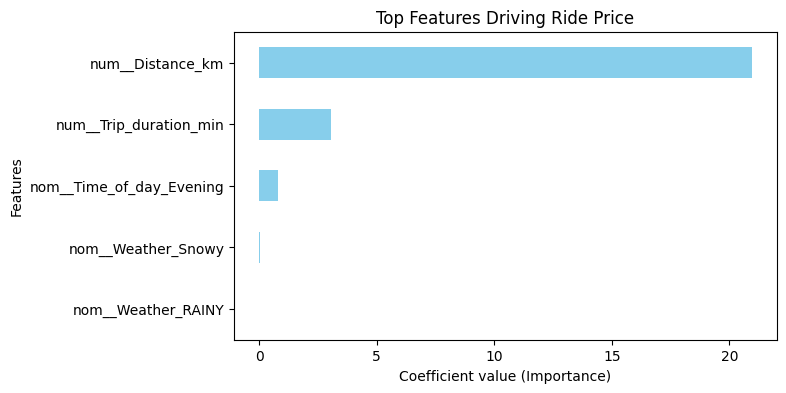

In [22]:
# Visualinsing feature importance

# Getting feature names after dropping the target column
feature_names = x.columns

# Now create the Series
feat_importances = pd.Series(model_1.coef_, index=feature_names)

# Plotting the top features
plt.figure(figsize=(7,4))
feat_importances.nlargest(5)[::-1].plot(kind='barh', color='skyblue')
plt.title('Top Features Driving Ride Price')
plt.xlabel('Coefficient value (Importance)')
plt.ylabel('Features')
plt.show()

### **7. Ethical & Practical Reflection**

##### Potential Unfair Pricing Behavior
- If the model learns that users in certain neighborhoods are willing to pay more—or have fewer transportation alternatives—it might hike prices for those specific areas.Lower-income individuals are charged more for the same distance simply because the model identifies them as "price inelastic" or high-demand targets.
##### Real-World Risk of Deploying This Model
- If the training data contains biases (e.g., higher prices during emergencies or in specific demographic zones), the model will automate and amplify these biases.In a real-world deployment, if the model over-predicts price during a "High Demand" event like a storm, it could prevent people from reaching safety or essential services, prioritizing profit over public welfare.
##### One Limitation of the Dataset
- The model doesn't understand even not know, the relationship between the change in car oil price and ride price. But, as oils are the main driving energy in vehicle, changes made in oil market directly affects a ride price. However, the dataset lacks this feature.

-----------------------------------------------------------

Name: Yordanos Teshome, 1487/15